<a href="https://colab.research.google.com/github/umais52/Machine-Learning-Projects/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Student_Performance.csv")

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


 **Visualizing the Dataset**

---



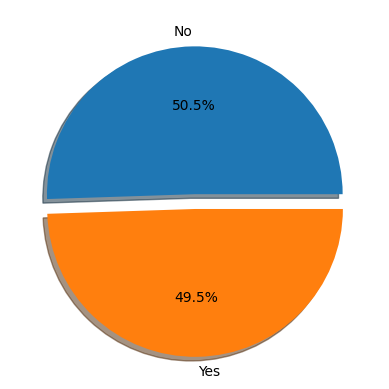

In [7]:
plt.pie(data['Extracurricular Activities'].value_counts(),labels = data['Extracurricular Activities'].value_counts().index,shadow = True,autopct = '%1.1f%%',explode=[0,0.1])
plt.show()

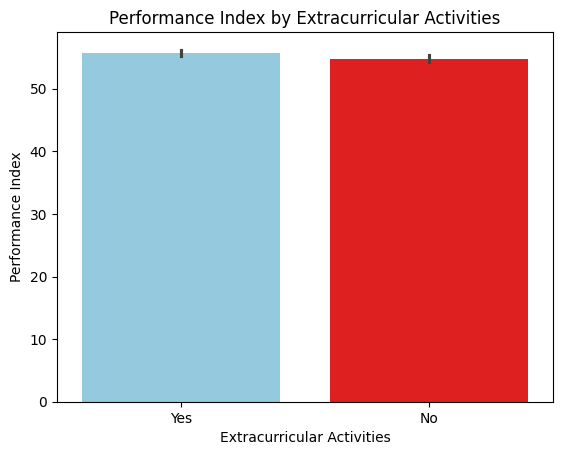

In [8]:
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data, hue='Extracurricular Activities', palette=['skyblue', 'red'], legend=False)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.show()

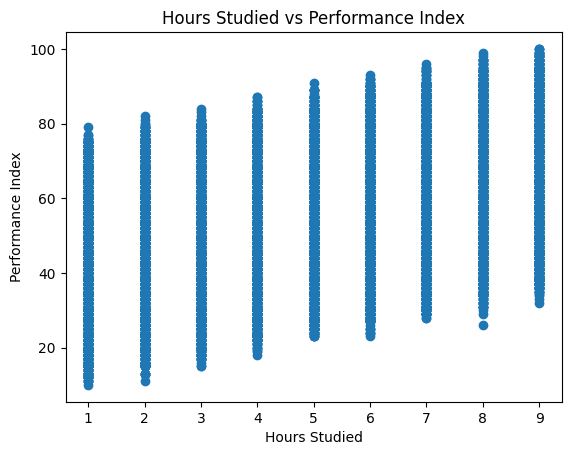

In [9]:
plt.scatter(data['Hours Studied'],data['Performance Index'])
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

<Axes: >

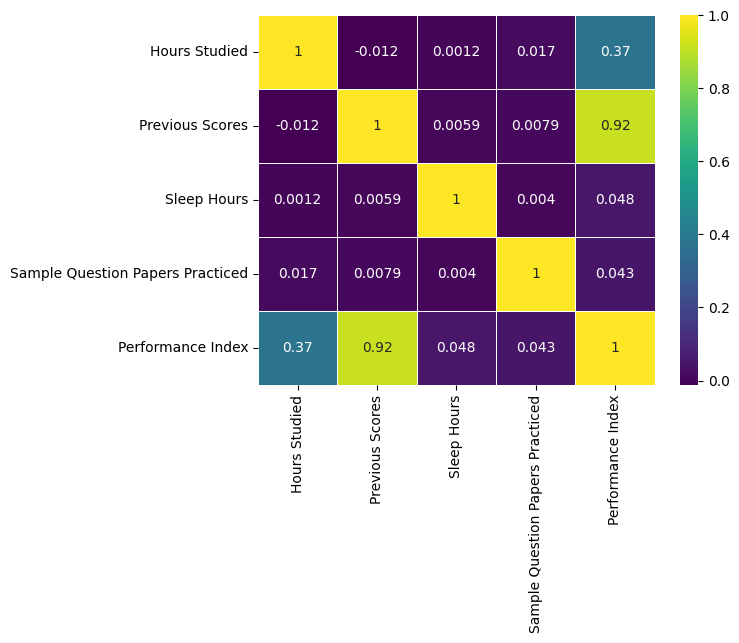

In [10]:
import warnings
warnings.filterwarnings("ignore")

correlation_matrix = data[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']].corr()
sns.heatmap(correlation_matrix,annot = True,cmap = 'viridis',linewidths = 0.5)

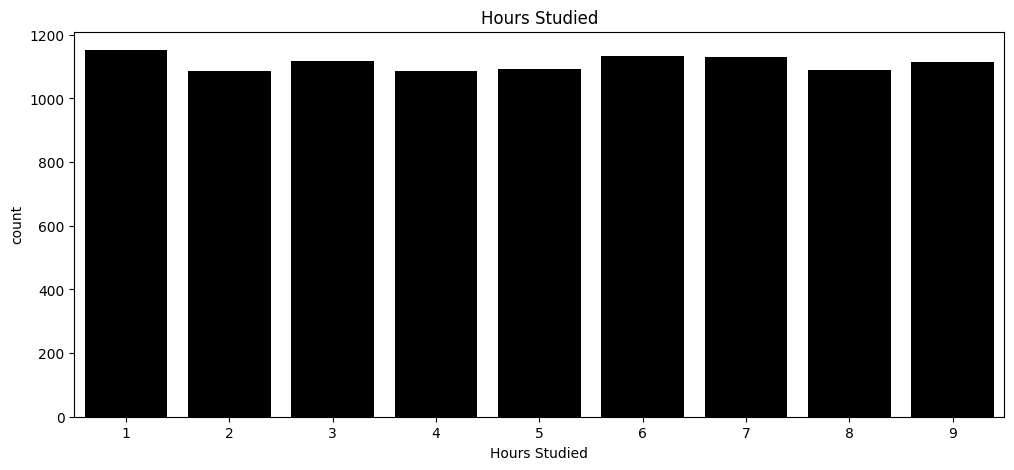

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='Hours Studied', data = data,color = 'black')
plt.title('Hours Studied')
plt.show()

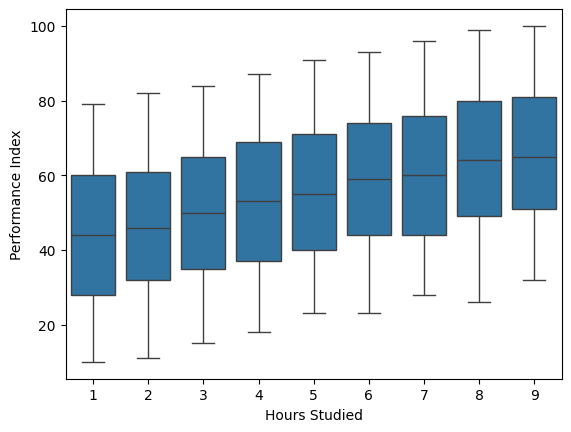

In [12]:
sns.boxplot(x= 'Hours Studied',y = 'Performance Index',data=data)
plt.show()

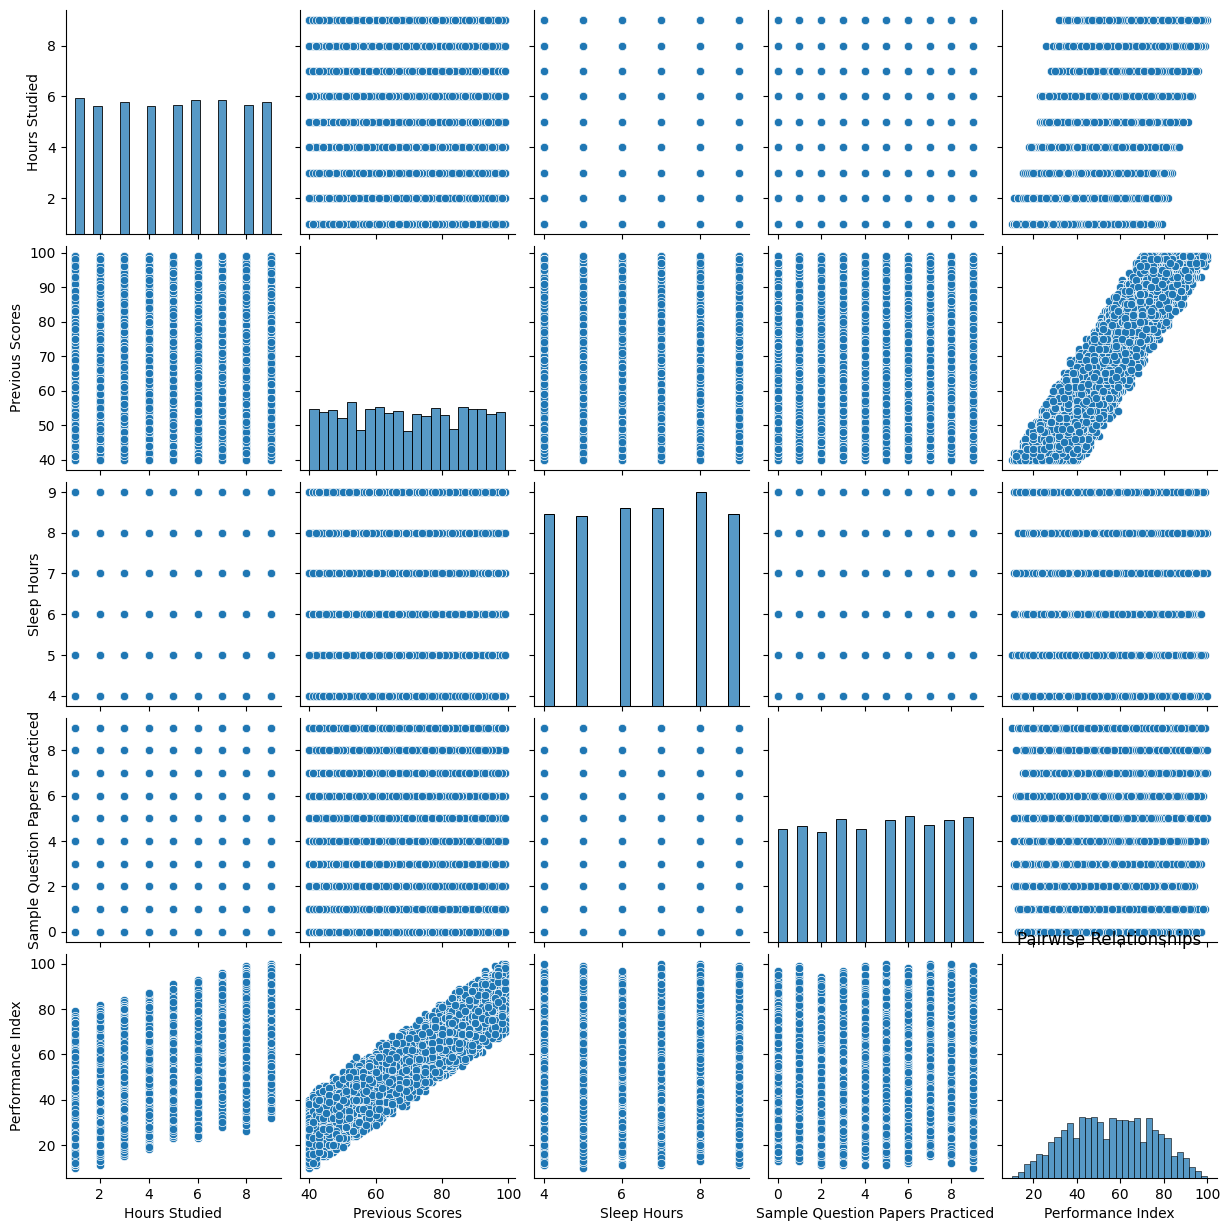

In [13]:
sns.pairplot(data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title('Pairwise Relationships')
plt.show()

Data & Model

---



In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [15]:
X = data.drop(columns = ['Performance Index'])
y = data['Performance Index']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 313)

In [16]:
encoder = LabelEncoder()
X_train['Extracurricular Activities'] = encoder.fit_transform(X_train['Extracurricular Activities'])
X_test['Extracurricular Activities'] = encoder.transform(X_test['Extracurricular Activities'])
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.9897939284294164

In [17]:
scores = []
for i in range(1000):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=i)
  X_train['Extracurricular Activities'] = encoder.fit_transform(X_train['Extracurricular Activities'])
  X_test['Extracurricular Activities'] = encoder.transform(X_test['Extracurricular Activities'])
  lr.fit(X_train,y_train)
  scores.append(r2_score(y_test,lr.predict(X_test)))

In [18]:
np.argmax(scores)

np.int64(313)

In [19]:
scores[np.argmax(scores)]

0.9897939284294164

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=int(np.argmax(scores)))
X_train['Extracurricular Activities'] = encoder.fit_transform(X_train['Extracurricular Activities'])
X_test['Extracurricular Activities'] = encoder.transform(X_test['Extracurricular Activities'])
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.9897939284294164

In [22]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : y_pred})

,Actual Performance,Predicted Performance
4393,61.0,64.553775
5638,27.0,27.840850
5869,38.0,32.905902
6172,63.0,65.607412
288,76.0,77.720477
...,...,...
8052,43.0,40.796217
8207,24.0,23.679086
6566,57.0,58.403728
3591,55.0,56.567108
